In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tqdm import tqdm
import sys
sys.path.append('/fs/cbsuvlaminck2/workdir/bmg224/hiprfish/image_analysis_code')
import image_functions as imfn
# from segmentation import Segmentation


In [3]:
# from image import Image

In [4]:
cluster_path = '/fs/cbsuvlaminck2/'
data_dir = cluster_path + '/workdir/bmg224/data/2021/brc_fileshare_new/2021_06_02_plasmidairyscan/processed'
sample_names = imfn.get_sample_names(data_dir=data_dir)
refl = ['gfp', 'cy5']
factors = ['exp','method', 'plasmid','fov']
flat_field_filename = ''
print(len(sample_names))
print(sample_names[0])

47
2021_06_02_plasmidairyscan_exp_040421_method_f_plasmid_pos_fov_tile2_Airyscan_Processing_Stitch


In [5]:
keys =[imfn.get_filename_keys(sn, factors) for sn in sample_names]
len(keys)

47

In [7]:
# Load split dirs
out_dir = '../image_processing'
spot_split_dirs = [out_dir + '/' + sn + '_spot_seg_split' for sn in sample_names]
cell_split_dirs = [out_dir + '/' + sn + '_cell_seg_split' for sn in sample_names]

In [9]:
# Get split names in specific order
import glob
import re
import os
spot_segs_split = [glob.glob(spd + '/*seg.npy') for spd in spot_split_dirs]
split_names = [[re.sub('_seg.npy','',os.path.split(n)[1]) for n in names] for names in spot_segs_split]


In [11]:
# load cell id info
import pandas as pd
spot_cid_split = [[pd.read_csv(dirs + '/' +  n + '_cell_id.csv') for n in names] for dirs, names in zip(spot_split_dirs, split_names)]
cell_props_split = [[pd.read_csv(dirs + '/' +  n + '_props.csv') for n in names] for dirs, names in zip(cell_split_dirs, split_names)]
# spot_raws_split = [[np.load(dirs + '/' +  n + '.npy') for n in names] for dirs, names in zip(spot_split_dirs, split_names)]
# spot_segs_split = [[np.load(dirs + '/' +  n + '_seg.npy') for n in names] for dirs, names in zip(spot_split_dirs, split_names)]
# cell_raws_split = [[np.load(dirs + '/' +  n + '.npy') for n in names] for dirs, names in zip(cell_split_dirs, split_names)]
# cell_segs_split = [[np.load(dirs + '/' +  n + '_seg.npy') for n in names] for dirs, names in zip(cell_split_dirs, split_names)]


In [27]:
thresh = (0.01, 5)
spot_props_thresh = [[sp.loc[(sp.MaxIntensity > thresh[0]) & (sp.dist < thresh[1])] for sp in spot_props] for spot_props in spot_cid_split]
# spot_props_thresh = [sp.loc[(sp.Intensity > thresh[0]) & (sp.Intensity < thresh[1])] for sp in spot_props]

spot_count = []
for spt, cp in tqdm(zip(spot_props_thresh, cell_props_split)):
    sp_ct = []
    for s, c in zip(spt, cp):
        for cid in c.ID.values:
            sp_ct.append(s.loc[s.cell_id == cid].shape[0])
    spot_count.append(sp_ct)

len(spot_count)

47it [00:32,  1.43it/s]


47

In [28]:
im_seg_dict = imfn.get_nested_dict(keys, spot_count, (0,1,2))

In [29]:
import image_plots as ip

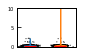

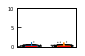

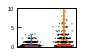

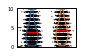

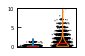

In [61]:
import numpy as np
# ft = 5
# dims = (5,5)
# col = 'w'
# dot_factor = 0.5

ft = 5
dims = (0.9843,0.5905512)
col = 'k'
dot_factor = 2
lw=1

import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

transparency = 0.8
fig_dir = '../figures'
dates = ['080220','080220','080220','040421','040421']
plots = ['a','b','c.1','b','g']
groups = ['neg', 'pos']
xticklabels = ['Control', 'Positive']
xlabel = ''
ylabel = ''
jit = 0.15
y_jit = 0.1
ylims = (-0.2,10)

for d, pl in zip(dates,plots):
#     labels = times
#     fig, ax = plt.subplots(figsize=(dims[0], dims[1]),  tight_layout={'pad': 0})
#     ax.spines['top'].set_color(col)
#     ax.spines['bottom'].set_color(col)
#     ax.spines['left'].set_color(col)
#     ax.spines['right'].set_color(col)
#     ax.tick_params(bottom=False, direction='in', color=col, labelcolor=col)  
#     xticks = np.arange(len(times))
#     ax.set_xticks(xticks)
#     ax.set_xticklabels(labels, fontsize=ft*5//6)
# #     ax.set_title('Phage: ' + phage, fontsize=ft*5//6, color=col)
#     ax.set_xlabel(xlabel, fontsize=ft, color=col)
#     ax.set_ylabel(ylabel, fontsize=ft, color=col)
    fig, ax = ip.general_plot(col=col, dims=dims, lw=lw, ft=ft)
    xticks = ip.get_xticks(groups)
    ax.set_xticks(xticks)
    ax.set_xticklabels([],visible=False)
    ax.set_ylim(ylims[0],ylims[1])
    ax.set_yticks([0,5,10])
    values = []
    line_colors = [colors[0],colors[1]]
    for g, position, lc in zip(groups, xticks, line_colors):
#         print(g)
        tup_list = im_seg_dict[d][pl][g]
        g_values = []
        for k, fov in tup_list:
            g_values += fov
#             print(len(g_values))
        values.append(g_values)
#         print(len(values[0]))
#     print(len(values[0]), len(values[1]))
#             jitter_x = np.random.normal(scale=jit, size=len(values))
#             x_list = np.repeat(position, len(values)) + jitter_x
#             jitter_y = np.random.normal(scale=y_jit, size=len(values))
#             y_list = np.array(values) + jitter_y
#             ymax = np.max(values)
#             ymean = np.mean(values)
#             ax.scatter(x_list, y_list, s=ft*dot_factor, marker='.', edgecolors='none', alpha=transparency, c=col)
#             ax.hlines(ymean, position - jit*2, position + jit*2, colors='red', linewidth=ft * 0.15)

        ip.violin_dot_plot(ax, [g_values], [position], y_jit=y_jit, col=col, line_col=lc, bw=0.5, lw=lw)
    ip.adjust_ylims(ax, lims=ylims, values=values, int_ticks=False)            
    output_filename = fig_dir + '/spot_count_' + d + '_' + pl + '.pdf' 
    ip.plt.savefig(output_filename, transparent=True)
